
# Problem
## Binary classes
In this notebook, we consider the logistic regression problem, i.e linear function for classfication.
Given a dataset $\{x_i, y_i\}_{i=1}^N$, where each $x_i$ is a feature vector and $y_i \in \{0, 1\}$ a binary label. We want to find the best linear model that fit the given data in terms of the *binary cross entropy (BCE)* metric.

Unlike in the linear regression problem, our labels are now constrained in the two values of 0 and 1, we can think of this two value as the probabilities that a given datapoint belong to class 1, i.e. if the label is 1 then the probability of that data point to be in class 1 is 100% - a distribution of class conditioned on datapoints. With this interpretation, if we also constrain the output of our model to be also a distribution, then the use of BCE is apparent: it can be seen as the distance between two distributions, similar to the MSE loss (l2 distance) in the Euclidean space.

To transform the output of a linear model to a (binary) distribution, we apply a sigmoid function at the end of the model. It is often used to convert continuous values in $(-\infty, \infty)$ to probabilities,
\begin{align}
P_{\theta}(Y=1 | X=x) &= \frac{1}{1+e^{-\theta^T x}} \\
\Rightarrow \theta^T x &= \text{ln}\frac{P_{\theta}(Y=1 | X=x) }{P_{\theta}(Y=0 | X=x) }
\end{align}
that is, the output of the linear model is now the logarithm of the probability ratio of the two classes.





## MLE formulation
Minimizing the BCE loss with the classification problem is actually MLE under the hood. Denote the output of the model as $f_{\theta}(x) = (1+\exp(-\theta^T x))^{-1}$, then
\begin{align}
\text{arg}\max_{\theta}P(\{x_i, y_i\}_{i=1}^N | \theta) &= \text{arg}\max_{\theta} \prod_{i=1}^N f_\theta (x_i)^{y_i} (1-f_\theta (x_i))^{1-{y_i}} \\
&= \text{arg}\max_{\theta} \sum_{i=1}^N y_i\text{ln}f_\theta (x_i) + (1-{y_i})\text{ln} (1-f_\theta (x_i)) \\
&= \text{arg}\min_{\theta} \sum_{i=1}^N BCE(f_\theta (x_i), y_i)
\end{align}

## Gradient derivation
We denote (scalar) logit for the class 1 as $z=\theta ^T x$, then we have the gradient of the sigmoid, denoted as $\sigma(\cdot)$, and the logit $z$ as follow:
\begin{align}
\frac{d\sigma(z)}{dz} &= \Big( \frac{1}{1+e^{-z}} \Big)^{'} = \frac{e^{-z}}{(1+e^{-z})^2} \\
&= \sigma(z) (1-\sigma(z))
\end{align}
Note that we also have $f_{\theta}(x) = \sigma (\theta^T x)$,
we are now ready to calculate the gradient of the BCE objective w.r.t $\theta$
\begin{align}
\nabla_{\theta} \sum_{i=1}^N BCE(f_\theta (x_i), y_i) &= -\sum_{i=1}^N\nabla_\theta \big( y_i\text{ln}f_\theta (x_i) + (1-{y_i})\text{ln} (1-f_\theta (x_i) \big)\\
&= -\sum_{i=1}^N y_i \frac{\nabla_\theta f_\theta (x_i)}{f_\theta (x_i)} - (1-{y_i})\frac{\nabla_{\theta}f_\theta (x_i)}{1-f_\theta (x_i)} \\
&= -\sum_{i=1}^N \frac{y_i - f_\theta (x_i)}{f_\theta (x_i) (1-f_\theta (x_i))} \nabla_{\theta} f_\theta (x_i) \\
&=-\sum_{i=1}^N (y_i - f_\theta (x_i)) \nabla_{\theta} z \\
&=-\sum_{i=1}^N (y_i - f_\theta (x_i)) x_i \\
&=X^T ( f_\theta(X) - y)
\end{align}
From the above gradient, we can also see that there is no closed form of the optimal solution for the logistic regression problem, because such solution would require the $\theta$ to diverge to infinity (the sigmoid function tend to 0 and 1 at infinity). In the next section, we will use gradient descent to optimize the logistic regression models.

## Multiple classes
When the data has more than two classes, i.e. $\{1, \dots C\}$, with some number of classes $C$, then the above formulas is not applicable. In this section, we examine the logistic regression for multiple classes.

$X\in \mathbb R^{N \times d}$, $\theta \in \mathbb R^{d \times C}$, $y \in \mathbb R^{N \times C}$, $y_i$ are one hot vectors. The output are fed through a softmax layer.
$$f_\theta(x)_i = \frac{e^{\theta_i^T x}}{\sum_j^Ce^{\theta_j ^T x}}$$
By using similar arguments, we can show that the MLE of the above model class can be obtained by minimizing the cross entropy loss on the dataset. We will not repeat it here. The objective of the optimization
$$L(\theta, X, y) = -\sum_{i=1}^N \sum_j^C y_{ij}\text{ln} f_{\theta}(x_i)_j$$
Let $z_m = \theta_m ^T x$ and $Z = \sum_i e^{z_i}$, then
\begin{align}
\frac{\partial \text{ln}f_\theta(x)_j}{\partial z_m} = \frac{Z}{e^{z_j}} \Big[
    \frac{\mathbf 1(m=j)Ze^{z_j} - e^{z_j + z_m}}{Z^2}
     \Big] = \mathbf 1(m=j) - f_{\theta}(x)_m
\end{align}
substitute the above into the gradient of cross entropy
\begin{align}
\nabla_{\theta_m} L(\theta, X, y) &= -\sum_{i=1}^N \sum_j^C y_{ij}
[\mathbf 1(m=j) - f_{\theta}(x_i)_m]x_i\\
\Rightarrow \nabla_{\theta} L(\theta, X, y) &= -\sum_{i=1}^N x_i y_i^T (I - \mathbf 1_C f_{\theta}(x_i)^T) \\
&= -\sum_{i=1}^N x_i (y_i^T - f_{\theta}(x_i)^T)\\
&= X^T (f_{\theta}(X) - y)
\end{align}
The gradient looks exactly the same as in the binary class cases.

# Using logistic regression


In [20]:
#@title import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Binary classification
Data Set Information: Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.

In [21]:
#@title helper functions
def eval(X, y, theta): # Binary Cross Entropy
    sigmoid = 1 / (1 + np.exp(-X @ theta) )
    bce = -np.mean(
        y * np.log(sigmoid + 1e-6) + (1-y) * np.log(1 - sigmoid + 1e-6)
    )
    return bce

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read dataset
df = pd.read_csv('Raisin_Dataset.csv')
# Encode the classes
df['Class'] = df['Class'].map({'Kecimen': 0, 'Besni': 1})

# Get X, y
X = df.drop('Class', axis=1)
y = df['Class']

X = np.array(X)
y = np.array(y)
print('X, y', X.shape, y.shape)

# Initialize scalers
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=23, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

type(X_train), type(y_train)

X, y (900, 7) (900,)
(720, 7) (720,)
(180, 7) (180,)


(numpy.ndarray, numpy.ndarray)

In [23]:
# @title Naive Bayes
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Gauss Naive Bayes model accuracy os Sklearn (in %):", acc*100)

Gauss Naive Bayes model accuracy os Sklearn (in %): 84.44444444444444


In [24]:
# @title LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy os Sklearn (in %):", acc*100)

Logistic Regression model accuracy os Sklearn (in %): 87.22222222222223


final loss: 0.6179254207774286


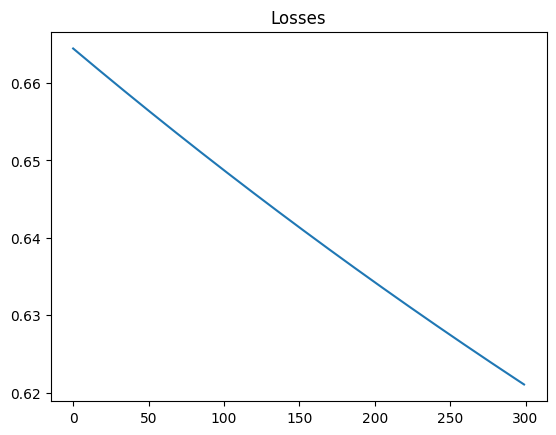

train Accuracy: 0.8277777777777777
test Accuracy: 0.8055555555555556


In [25]:
#@title Full Gradient descent
assert y_train.max() <= 1

lr = 5e-7
epoch = 300

losses = []

# init theta
current_theta = np.random.randn((X_train.shape[-1]))/10

for _ in range(epoch):
    losses.append(eval(X_train, y_train, current_theta))

    sigmoid = 1 / (1 + np.exp(-X_train @ current_theta) )
    grad = X_train.T @ (sigmoid - y_train)
    current_theta -= grad * lr

print("final loss:", eval(X_test, y_test, current_theta))
plt.plot(losses)
plt.title("Losses")
plt.show()

sigmoid_train = 1 / (1 + np.exp(-X_train @ current_theta) )
y_pred = np.round(sigmoid_train)
accuracy = np.mean(y_pred == y_train)
print("train Accuracy:", accuracy)

sigmoid_test = 1 / (1 + np.exp(-X_test @ current_theta) )
y_pred = np.round(sigmoid_test)
accuracy = np.mean(y_pred == y_test)
print("test Accuracy:", accuracy)


final loss: 0.562253574886255


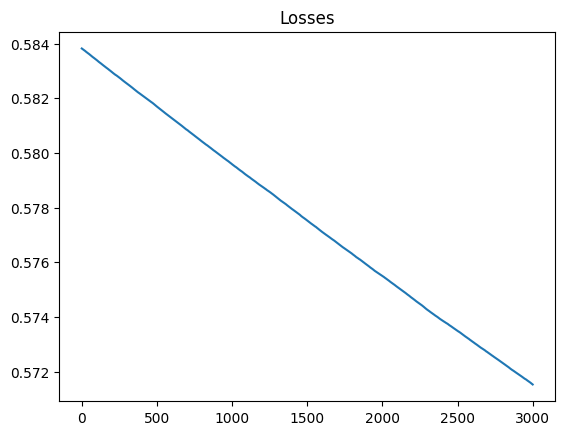

train Accuracy: 0.8375
test Accuracy: 0.8444444444444444


In [26]:
#@title minibatch Gradient descent

assert y_train.max() <= 1
batch_size = 32
lr = 5e-7
epoch = 3000

losses = []

# init theta
current_theta = np.random.randn((X_train.shape[-1]))/10

for _ in range(epoch):
    losses.append(eval(X_train, y_train, current_theta))

    indx = np.random.choice(X_train.shape[0], batch_size)
    X_batch = X_train[indx]
    y_batch = y_train[indx]

    sigmoid = 1 / (1 + np.exp(-X_batch @ current_theta) )
    grad = -X_batch.T @ (y_batch - sigmoid)
    current_theta -= grad * lr

print("final loss:", eval(X_test, y_test, current_theta))
plt.plot(losses)
plt.title("Losses")
plt.show()

sigmoid_train = 1 / (1 + np.exp(-X_train @ current_theta) )
y_pred = np.round(sigmoid_train)
accuracy = np.mean(y_pred == y_train)
print("train Accuracy:", accuracy)

sigmoid_test = 1 / (1 + np.exp(-X_test @ current_theta) )
y_pred = np.round(sigmoid_test)
accuracy = np.mean(y_pred == y_test)
print("test Accuracy:", accuracy)



 **Remark:** The training of the gradient descent in our example is very unstable, because the pure gradient descent is noisy. In practice, we usually employ several tricks to make the Gradient descent more robust, for example using momentum, normalizing the data, cliping gradient, using other more sophisticated optimizer such as Adam. In the next section, we will normalize the input data dimension-wise before training with gradient descent

final loss: 0.3181131684155009


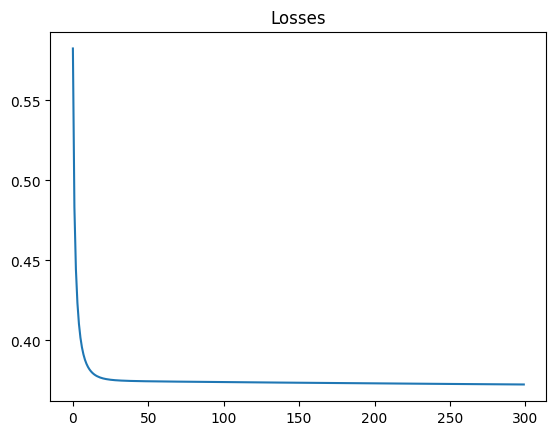

train Accuracy: 0.8722222222222222
test Accuracy: 0.8666666666666667


In [27]:
#@title Full Gradient descent (normalized input)

assert y_train.max() <= 1

X_mean = np.mean(X_train, axis=0, keepdims=True)
X_std = np.std(X_train, axis=0, keepdims=True)

X_train = (X_train - X_mean) / (X_std+1e-8)
X_test = (X_test - X_mean) / (X_std+1e-8)

lr = 1e-3
epoch = 300

losses = []

# init theta
current_theta = np.random.randn((X_train.shape[-1]))

for _ in range(epoch):
    losses.append(eval(X_train, y_train, current_theta))

    sigmoid = 1 / (1 + np.exp(-X_train @ current_theta) )
    grad = -X_train.T @ (y_train - sigmoid)
    current_theta -= grad * lr

print("final loss:", eval(X_test, y_test, current_theta))
plt.plot(losses)
plt.title("Losses")
plt.show()

sigmoid_train = 1 / (1 + np.exp(-X_train @ current_theta) )
y_pred = np.round(sigmoid_train)
accuracy = np.mean(y_pred == y_train)
print("train Accuracy:", accuracy)

sigmoid_test = 1 / (1 + np.exp(-X_test @ current_theta) )
y_pred = np.round(sigmoid_test)
accuracy = np.mean(y_pred == y_test)
print("test Accuracy:", accuracy)



final loss: 0.32284298089898206


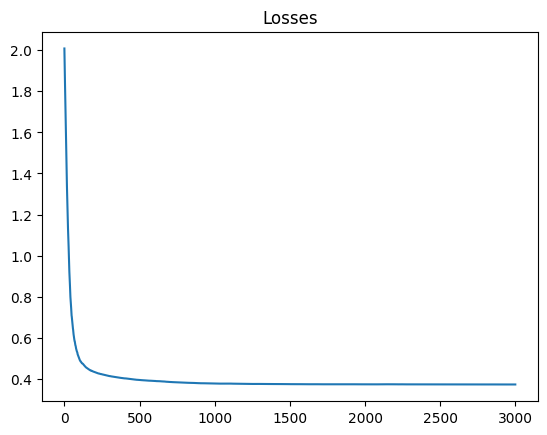

train Accuracy: 0.8708333333333333
test Accuracy: 0.8611111111111112


In [28]:
#@title minibatch Gradient descent (normalized input)

assert y_train.max() <= 1
batch_size = 32
lr = 1e-3
epoch = 3000

losses = []

# init theta
current_theta = np.random.randn((X_train.shape[-1]))

for _ in range(epoch):
    losses.append(eval(X_train, y_train, current_theta))

    indx = np.random.choice(X_train.shape[0], batch_size)
    X_batch = X_train[indx]
    y_batch = y_train[indx]

    sigmoid = 1 / (1 + np.exp(-X_batch @ current_theta) )
    grad = -X_batch.T @ (y_batch - sigmoid)
    current_theta -= grad * lr

print("final loss:", eval(X_test, y_test, current_theta))
plt.plot(losses)
plt.title("Losses")
plt.show()

sigmoid_train = 1 / (1 + np.exp(-X_train @ current_theta) )
y_pred = np.round(sigmoid_train)
accuracy = np.mean(y_pred == y_train)
print("train Accuracy:", accuracy)

sigmoid_test = 1 / (1 + np.exp(-X_test @ current_theta) )
y_pred = np.round(sigmoid_test)
accuracy = np.mean(y_pred == y_test)
print("test Accuracy:", accuracy)


It is much better by just simply normalizing the input data to an appropriate range.

## Multiple classification
The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

In [29]:
#@title helper functions
def eval(X, y, theta):
    z = np.exp(X @ theta )
    softmax = z / np.sum(z, axis=-1, keepdims=True)
    ce = -np.mean(
        y * np.log(softmax)
    )
    return ce

def accuracy(X, y, theta):
    logits = X @ theta
    pred = np.argmax(logits, axis=-1)
    pred = pred.reshape(y.shape)
    return np.mean(pred == y)

def softmax(X, theta):
    z = np.exp(X @ theta)
    return z / np.sum(z, axis=-1, keepdims=True)


In [33]:
X, y = load_wine(return_X_y=True)

from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
X_scaled = x_scaler.fit_transform(X)

# split the train and test dataset
n_classes = np.max(y)+1

X_train, X_test,\
    y_train, y_test = train_test_split(X_scaled, y,
                                       test_size=0.20,
                                       random_state=23)

X_train.shape, y_train.shape, n_classes

((142, 13), (142,), np.int64(3))

In [34]:
y_train_onehot = np.zeros((y_train.shape[0], n_classes), dtype=int)
y_train_onehot[np.arange(y_train.shape[0]), y_train] = 1

X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=-1) # add bias
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=-1)

y_train_onehot.shape

(142, 3)

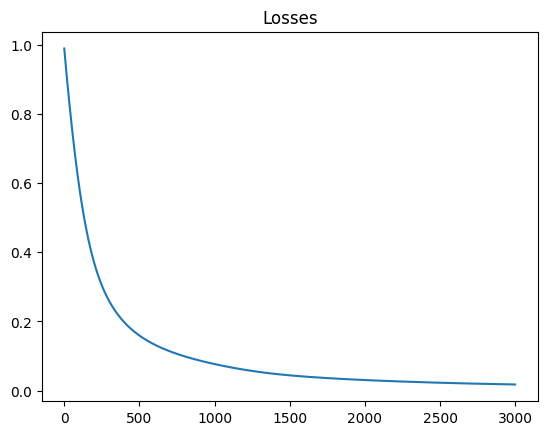

train Accuracy: 0.9788732394366197
test Accuracy: 0.9722222222222222


In [35]:
#@title Full Gradient descent

lr = 1e-4
epoch = 3000

losses = []

# init theta
current_theta = np.random.randn(X_train.shape[-1], n_classes)

for _ in range(epoch):
    losses.append(eval(X_train, y_train_onehot, current_theta))

    sm = softmax(X_train, current_theta)
    grad = X_train.T @ (sm - y_train_onehot)
    current_theta -= grad * lr

plt.plot(losses)
plt.title("Losses")
plt.show()

acc = accuracy(X_train, y_train, current_theta)
print("train Accuracy:", acc)

acc = accuracy(X_test, y_test, current_theta)
print("test Accuracy:", acc)



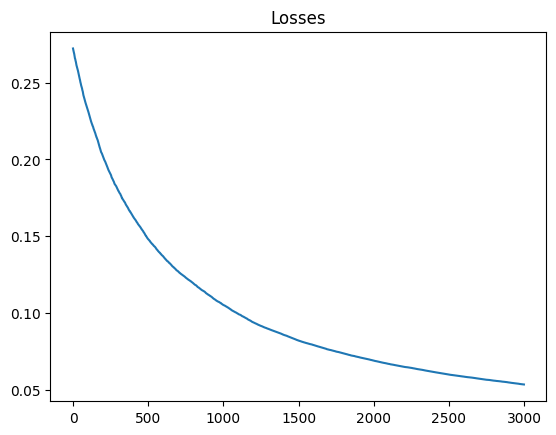

train Accuracy: 0.9366197183098591
test Accuracy: 1.0


In [36]:
#@title minibatch Gradient descent

batch_size = 16
lr = 1e-4
epoch = 3000

losses = []

# init theta
current_theta = np.random.randn(X_train.shape[-1], n_classes)

for _ in range(epoch):
    losses.append(eval(X_train, y_train_onehot, current_theta))

    indx = np.random.choice(X_train.shape[0], batch_size)
    X_batch = X_train[indx]
    y_batch = y_train_onehot[indx]

    sm = softmax(X_batch, current_theta)
    grad = X_batch.T @ (sm - y_batch)
    current_theta -= grad * lr

plt.plot(losses)
plt.title("Losses")
plt.show()

acc = accuracy(X_train, y_train, current_theta)
print("train Accuracy:", acc)

acc = accuracy(X_test, y_test, current_theta)
print("test Accuracy:", acc)



In [37]:
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy os Sklearn (in %):", acc*100)

Logistic Regression model accuracy os Sklearn (in %): 100.0


Since the data distribution of the iris dataset is not very skewed, gradient descent can achieve stable performance even without normalizing input data. Though applying the normalization would still increase the convergence rate.